Day 5
=====
Demonstrates the use of Datashader

In [ ]:
import numpy as np
from collections import namedtuple
import re
import datashader as ds
import datashader.transfer_functions as tf
import xarray as xr
from colorcet import fire

In [73]:
with open("../dat/day5.txt") as f:
    lines = [ x.strip() for x in f.readlines() ]

In [74]:
line_t = namedtuple("Line", ['x1', 'y1', 'x2', 'y2'])
line_re = re.compile("^(\d+),(\d+)\s+->\s+(\d+),(\d+)$")
# Parse into useable lines, learn dimensions
data = []
max_x = 0
max_y = 0
for ll in lines:
    line_match = line_re.match(ll)
    if line_match:
        data.append(line_t(
            x1=int(line_match.group(1)),
            y1=int(line_match.group(2)),
            x2=int(line_match.group(3)),
            y2=int(line_match.group(4)),
        ))
        max_x = max(max_x, data[-1].x1, data[-1].x2)
        max_y = max(max_y, data[-1].y1, data[-1].y2)

print("loaded", len(data), "lines", max_x, max_y)

loaded 500 lines 989 989


In [83]:
def map_thermal_vents(vent_data, include_diag=False):
    ocean_floor_map = np.zeros((max_x+1, max_y+1))
    for dd in vent_data:
        # In the data the slope is always 0, 1.0, -1.0, or infinite
        if (dd.x1 - dd.x2) != 0:
            slope = (dd.y1 - dd.y2) / (dd.x1 - dd.x2)
        else:
            slope = None # vertical line
        
        if slope not in (0, None, -1, 1):
            raise ValueError('invalid slope %s in input' % slope)

        if slope is None:
            y_min = min(dd.y1, dd.y2)
            y_max = max(dd.y1, dd.y2)
            assert dd.x1 ==  dd.x2
            for y in range(y_min, y_max+1):
                ocean_floor_map[y][dd.x1] += 1
        elif slope == 0:
            x_min = min(dd.x1, dd.x2)
            x_max = max(dd.x1, dd.x2)
            assert dd.y1 ==  dd.y2
            for x in range(x_min, x_max+1):
                ocean_floor_map[dd.y1][x] += 1
        elif slope == 1 and include_diag is True:
            x_min = min(dd.x1, dd.x2)
            x_max = max(dd.x1, dd.x2)
            y_min = min(dd.y1, dd.y2)
            y_max = max(dd.y1, dd.y2)

            y = y_min
            for x in range(x_min, x_max+1):
                ocean_floor_map[y][x] += 1
                y += 1
        elif slope == -1 and include_diag is True:
            x_min = min(dd.x1, dd.x2)
            x_max = max(dd.x1, dd.x2)
            y_min = min(dd.y1, dd.y2)
            y_max = max(dd.y1, dd.y2)

            y = y_max
            for x in range(x_min, x_max+1):
                ocean_floor_map[y][x] += 1
                y -= 1

    return ocean_floor_map

def count_dangerous_places(ocean_floor_map, threshold=2):
    threshold_mask = np.full(ocean_floor_map.shape, threshold)
    dangerous_places = np.greater_equal(ocean_floor_map, threshold_mask)
    ans = dangerous_places.sum() # True becomes 1
    return ans

Part 1 Answer: 7438


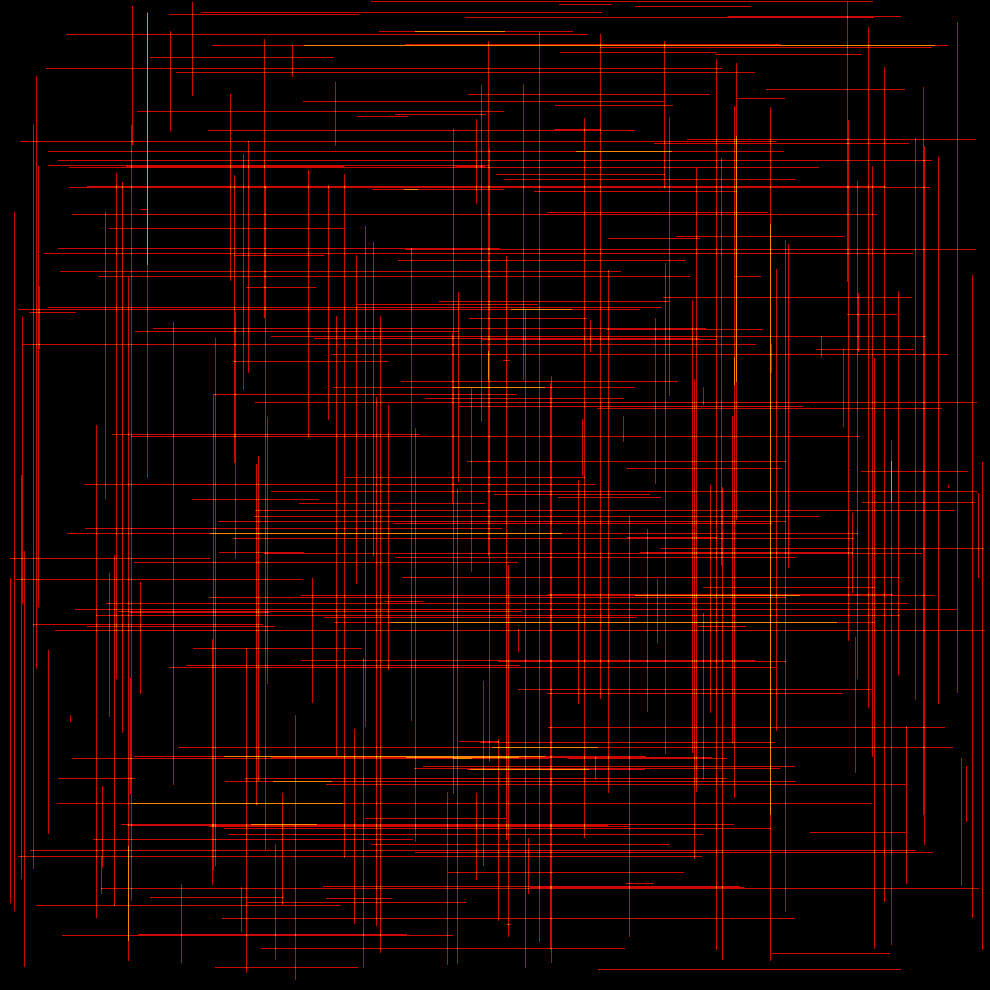

In [117]:
ocean_floor_map = map_thermal_vents(data)
part1 = count_dangerous_places(ocean_floor_map)
print("Part 1 Answer:", part1)

# Display the ocean floor map
display(tf.shade(xr.DataArray(ocean_floor_map), cmap = fire, how="log"))

21406


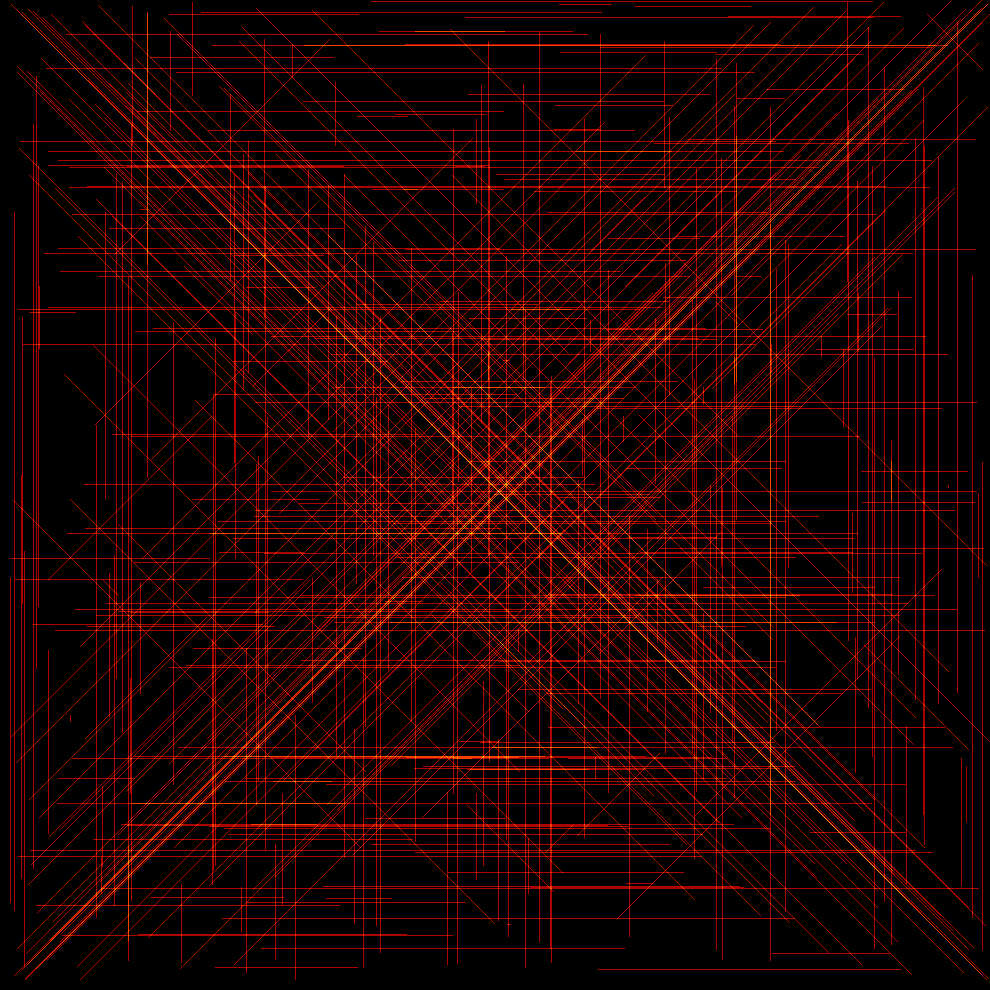

In [116]:
ocean_floor_map = map_thermal_vents(data, include_diag=True)
part2 = count_dangerous_places(ocean_floor_map)
print("Part 2 Answer:", part2)

# Display the ocean floor map
display(tf.shade(xr.DataArray(ocean_floor_map), cmap = fire, how="log"))